<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso1/ciclo4/Copia_de_taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1Q6vQcIWFPY27isBepABpJ7nroUNKox_Z" width="100%">

# **Taller 4**
---

En este taller se evaluarán las habilidades adquiridas en aprendizaje supervisado a partir del conjunto de datos [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

El conjunto de datos SMS Spam Collection de UCI es un conjunto de datos de mensajes de texto que se utiliza para entrenar y evaluar modelos de clasificación de spam. El conjunto de datos consta de 5572 mensajes de texto en inglés, clasificados como spam (marcado con la etiqueta "spam") o no spam (marcado con la etiqueta "ham").

<center><img src="https://drive.google.com/uc?export=view&id=1M9rsDDftSm947FhU2aEZmC5BX8lmVYhQ" width="80%"></center>

Los mensajes de texto incluidos en el conjunto de datos son mensajes de texto cortos, típicamente no más de 160 caracteres. Los mensajes de texto son de diferentes fuentes, como correos electrónicos, mensajes de texto de teléfonos móviles y mensajes de texto de redes sociales.

El conjunto de datos es anotado manualmente y se considera un conjunto de datos desbalanceado, ya que aproximadamente el 87% de los mensajes son no spam y el resto son spam. El conjunto de datos es muy utilizado para entrenar y evaluar modelos de clasificación de spam.

El conjunto de datos se proporciona en un archivo de texto plano con dos columnas: una con el mensaje de texto y otra con la etiqueta "spam" o "ham". Además, se proporciona un archivo de metadatos con información sobre el conjunto de datos y su historial.

Comenzaremos importando las librerías necesarias:

In [2]:
#TEST_CELL
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.1 MB/s eta 0:00:00


In [3]:
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from unidecode import unidecode
from IPython.display import display

Ahora cargamos el conjunto de datos:

In [4]:
#TEST_CELL
data = pd.read_parquet("https://raw.githubusercontent.com/mindlab-unal/mlds4-datasets/main/u4/spam.parquet")
display(data.head())

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Como podemos ver, el conjunto tiene columnas:

- `text`: texto del SMS.
- `label`: tipo de SMS (`spam` es texto no deseado y `ham` es texto válido)

Vamos a preprocesar el conjunto de datos:

In [5]:
nlp = spacy.blank("en")
def preprocess(text):
    doc = nlp(text) # creamos un documento de spacy
    no_stops = " ".join(
        token.text
        for token in filter(
            lambda token: not token.is_stop and len(token) > 3 and len(token) < 24,
            doc,
            )
        ) # eliminamos stopwords y palabras por longitud
    norm_text = unidecode(no_stops.lower()) # normalizamos el texto
    no_chars = re.sub(r"[^a-z ]", " ", norm_text) # eliminamos caracteres especiales
    no_spaces = re.sub(r"\s+", " ", no_chars) # eliminamos espacios duplicados
    return no_spaces.strip()

Aplicamos la función de preprocesamiento:

In [6]:
data["corpus"] = data.text.apply(preprocess)

Inspeccionemos el tamaño de este conjunto de datos:

In [7]:
#TEST_CELL
display(data.shape)

(5572, 3)

También podemos ver la distribución de etiquetas:

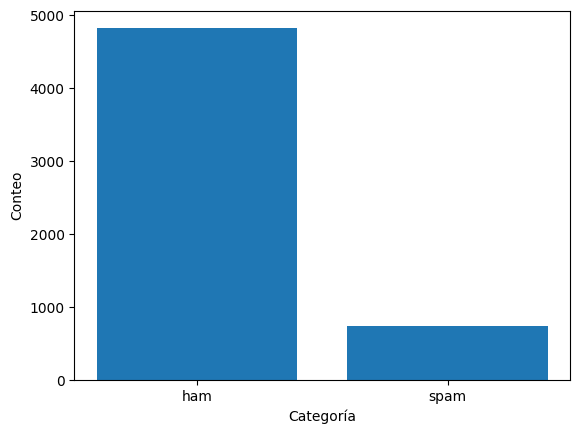

In [8]:
#TEST_CELL
fig, ax = plt.subplots()
labels, counts = np.unique(data.label, return_counts=True)
ax.bar(labels, counts)
ax.set_xlabel("Categoría")
ax.set_ylabel("Conteo")
fig.show()

Como podemos ver, se trata de un conjunto desbalanceado.

## **1. Extracción de Características**
---

En este punto deberá codificar de forma numérica el corpus. Para ello, deberá entrenar un vectorizador TF-IDF con sublinear scaling, además debe utilizar únicamente los 1000 términos más frecuentes.

Para esto, deberá implementar la función `vectorizer`, la cual recibirá el corpus preprocesado y deberá retornar un arreglo de `numpy` con la representación y el vectorizador.

**Parámetros**

- `corpus`: `pd.Series` con los textos del conjunto de datos.

**Retorna**:

- `features`: arreglo de numpy con la representación de tipo TF-IDF.
- `vect`: `TfidfVectorizer` entrenado con las especificaciones dadas.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que _sublinear scaling_ se puede controlar con el parámetro `sublinear_tf` del vectorizador.
- Recuerde convertir la representación en un arreglo de `numpy`.
</details>

In [11]:
# FUNCIÓN CALIFICADA vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorizer(corpus):
    ### ESCRIBA SU CÓDIGO AQUÍ ###

    vect = TfidfVectorizer(
        sublinear_tf=True,
        max_features=1000)
    tfidf_matrix = vect.fit_transform(corpus)
    features = tfidf_matrix.toarray()

    return features, vect
    ### FIN DEL CÓDIGO ###

In [12]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
display(features.shape)

(5572, 1000)

**Salida esperada**:

En este primer ejemplo debe obtener el tamaño de la representación:

```python
❱ display(features.shape)
(5572, 1000)
```

In [13]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
display(vect.get_feature_names_out()[:5])

array(['abiola', 'able', 'accept', 'access', 'account'], dtype=object)

**Salida esperada**:

En este caso deberá obtener las primeras 5 palabras del vocabulario:

```python
❱ display(vect.get_feature_names_out()[:5])
array(['abiola', 'able', 'accept', 'access', 'account'], dtype=object)
```

In [14]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
display(features.sum())

9861.088671252523

**Salida esperada**:

En este caso deberá obtener la suma de toda la matriz:

```python
❱ display(features.sum())
9861.088671252523
```

## **2. Codificación de Etiquetas**
---

Para el entrenamiento de un modelo debemos codificar las etiquetas de forma numérica. En este caso se debe implementar una solución un poco más sistemática, haciendo uso de un codificador de `sklearn`.

En este punto debe implementar la función `label_encode`, la cual toma como entrada la lista de etiquetas del conjunto de datos y deberá retornar una codificación numérica de las mismas y un codificador de tipo `LabelEncoder`.

**Parámetros**

- `labels`: `pd.Series` con las etiquetas en formato string.

**Retorna**:

- `encoded_labels`: etiquetas codificadas de forma numérica.
- `encoder`: `LabelEncoder` entrenado.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde invocar el método `.fit` del codificador antes de retornarlo.
- Evite usar el método `.fit_transform` para poder guardar el codificador.
</details>

In [15]:
# FUNCIÓN CALIFICADA label_encode:
from sklearn.preprocessing import LabelEncoder

def label_encode(labels):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    encoder = LabelEncoder()

    # Ajustar el codificador a las etiquetas
    encoder.fit(labels)

    # Codificar las etiquetas usando el codificador entrenado
    encoded_labels = encoder.transform(labels)
    return encoded_labels, encoder
    ### FIN DEL CÓDIGO ###

In [16]:
#TEST_CELL
encoded_labels, encoder = label_encode(data.label)
display(encoded_labels.shape)

(5572,)

**Salida esperada**:

En este primer ejemplo debe obtener el tamaño de las etiquetas:

```python
❱ display(encoded_labels.shape)
(5572,)
```

In [17]:
#TEST_CELL
encoded_labels, encoder = label_encode(data.label)
display(encoded_labels.mean())

0.13406317300789664

**Salida esperada**:

En este segundo ejemplo debe obtener el promedio de las etiquetas:

```python
❱ display(encoded_labels.mean())
0.13406317300789664
```

In [18]:
#TEST_CELL
encoded_labels, encoder = label_encode(data.label)
display(encoder.classes_)

array(['ham', 'spam'], dtype=object)

**Salida esperada**:

En este caso debe obtener un arreglo con las posibles categorías y la posición a las que son asignadas:

```python
❱ display(encoder.classes_)
array(['ham', 'spam'], dtype=object)
```

## **3. Validación Cruzada**
---

En este punto deberá particionar el conjunto de datos en una muestra de entrenamiento y otra para evaluación de forma estratificada.

Para ello, debe implementar la función `split_data`, que tiene como entrada las características, las etiquetas, la proporción de datos de prueba y una semilla de números aleatorios para retornar los datos particionados:

**Parámetros**

- `features`: arreglo de `numpy` con la representación de los textos.
- `labels`: arreglo de `numpy` con las etiquetas codificadas.
- `test_size`: proporción de datos para evaluación.
- `seed`: semilla de números aleatorios:

**Retorna**

- `features_train`: características de entrenamineto.
- `features_test`: características de prueba.
- `labels_train`: etiquetas de entrenamiento.
- `labels_test`: etiquetas de evaluación.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde usar el parámetro `stratify` para realizar la estratificación.
- `sklearn` maneja las semillas de números aleatorios con el parámetro `random_state`.
</details>

In [19]:
# FUNCIÓN CALIFICADA split_data:
from sklearn.model_selection import train_test_split

def split_data(features, labels, test_size, seed):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=test_size, random_state=seed, stratify=labels
    )
    return features_train, features_test, labels_train, labels_test
    ### FIN DEL CÓDIGO ###

In [20]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.3, seed=42
        )
display(features_train.shape)
display(features_test.shape)
display(labels_train.shape)
display(labels_test.shape)

(3900, 1000)

(1672, 1000)

(3900,)

(1672,)

**Salida esperada**:

En este primer ejemplo debe obtener el tamaño de cada arreglo:

```python
❱ display(features_train.shape)
(3900, 1000)

❱ display(features_test.shape)
(1672, 1000)

❱ display(labels_train.shape)
(3900,)

❱ display(labels_test.shape)
(1672,)
```

In [21]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.3, seed=42
        )
display(labels_train.mean())
display(labels_test.mean())

0.1341025641025641

0.1339712918660287

**Salida esperada**:

En este segundo ejemplo debe obtener el promedio de las etiquetas en cada partición:

```python
❱ display(labels_train.mean())
0.1341025641025641

❱ display(labels_test.mean())
0.1339712918660287
```

## **4. Modelo de Bosques Aleatorios**
---

En este punto deberá entrenar un modelo de bosques aleatorios sobre los datos de entrenamiento.

Para esto, debe implementar la función `random_forest`, la cual toma como entrada los datos de entrenamiento, la profundidad máxima de los árboles y el número de estimadores, para luego retornar un modelo entrenado.

**Parámetros**:

- `features_train`: características de entrenamiento.
- `labels_train`: etiquetas de entrenamiento.
- `max_depth`: profundidad máxima de los árboles.
- `n_estimators`: número de árboles en el bosque.
- `seed`: semilla de números aleatorios.

**Retorna**

- `model`: modelo de bosques aleatorios entrenado.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde utilizar el método `fit` del modelo antes de retornarlo.
</details>

In [22]:
# FUNCIÓN CALIFICADA random_forest:
from sklearn.ensemble import RandomForestClassifier

def random_forest(features_train, labels_train, max_depth, n_estimators, seed):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    model = RandomForestClassifier(max_depth=max_depth,
      n_estimators=n_estimators, random_state=seed)

    # entrenamiento
    model.fit(features_train, labels_train)
    return model
    ### FIN DEL CÓDIGO ###

In [23]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.3, seed=42
        )
model = random_forest(features_train, labels_train, 5, 50, 42)
display(model.max_depth)

5

**Salida esperada**:

En este primer ejemplo debe obtener la profundidad máxima del modelo:

```python
❱ display(model.max_depth)
5
```

In [24]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.3, seed=42
        )
model = random_forest(features_train, labels_train, 5, 50, 42)
display(model.n_estimators)

50

**Salida esperada**:

En este segundo ejemplo debe obtener el número de estimadores en el modelo:

```python
❱ display(model.n_estimators)
50
```

## **5. Evaluación**
---

En este punto deberá evaluar métricas típicas de clasificación sobre el modelo. En especial se busca que calcule el accuracy, precision, recall y f1-score para cada clase.

Para esto, debe implementar la función `evaluation`, la cual toma como entrada el modelo y los datos de prueba, y debe retornar un reporte de clasificación de `sklearn`:

**Parámetros**

- `model`: modelo entrenado.
- `features_test`: características de evaluación.
- `labels_test`: etiquetas de evaluación.

**Retorna**

- `report`: reporte de clasificación.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que la función `classification_report` retorna un string con el resultado. No se preocupe si no puede seleccionar una métrica en específico.
</details>

In [25]:
# FUNCIÓN CALIFICADA evaluation:
from sklearn.metrics import classification_report

def evaluation(model, features_test, labels_test):
    ### ESCRIBA SU CÓDIGO AQUÍ ###

    predictions = model.predict(features_test)
    report = classification_report(labels_test, predictions)

    return report
    ### FIN DEL CÓDIGO ###

In [26]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.3, seed=42
        )
model = random_forest(features_train, labels_train, 5, 50, 42)
report = evaluation(model, features_test, labels_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1448
           1       1.00      0.14      0.24       224

    accuracy                           0.88      1672
   macro avg       0.94      0.57      0.59      1672
weighted avg       0.90      0.88      0.84      1672



**Salida esperada**:

En este primer ejemplo debe obtener una tabla con las métricas del modelo:

```python
❱ print(report)
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1448
           1       1.00      0.14      0.24       224

    accuracy                           0.88      1672
   macro avg       0.94      0.57      0.59      1672
weighted avg       0.90      0.88      0.84      1672
```

In [27]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.4, seed=42
        )
model = random_forest(features_train, labels_train, 7, 100, 42)
report = evaluation(model, features_test, labels_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1930
           1       1.00      0.27      0.42       299

    accuracy                           0.90      2229
   macro avg       0.95      0.63      0.68      2229
weighted avg       0.91      0.90      0.88      2229



**Salida esperada**:

En este segundo ejemplo debe obtener una tabla con las métricas del modelo:

```python
❱ print(report)
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1930
           1       1.00      0.27      0.42       299

    accuracy                           0.90      2229
   macro avg       0.95      0.63      0.68      2229
weighted avg       0.91      0.90      0.88      2229
```

## **6. Importancia de Términos**
---

Una de las características del modelo de bosques aleatorios es que este permite extraer importancias de cada una de las características.

En este punto deberá extraer el top $N$ de términos más discriminantes de acuerdo al modelo de bosques aleatorios. Para esto, debe implementar la función `top_n_terms`, la cual recibe el vectorizador, el modelo entrenado y debe retornar una lista con los términos más relevantes.

**Parámetros**

- `vect`: vectorizador TF-IDF.
- `model`: modelo de bosques aleatorios entrenado.
- `n`: número de palabras a extraer.

**Retorna**

- `top_words`: lista con las palabras más relevantes.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Puede extraer el vocabulario del vectorizador con el método `get_feature_names_out`.
- Puede extraer la importancia de cada término del vocabulario con el atributo `feature_importances_` del modelo de bosques aleatorios.
</details>

In [28]:
# FUNCIÓN CALIFICADA evaluation:
from sklearn.metrics import classification_report

def top_n_terms(vect, model, n):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    # Obtener el vocabulario del vectorizador
    feature_names = vect.get_feature_names_out()

    # Obtener la importancia de cada término del modelo de bosques aleatorios
    feature_importances = model.feature_importances_

    # Ordenar las características por importancia en orden descendente
    top_indices = np.argsort(feature_importances)[::-1][:n]

    # Extraer las palabras correspondientes a las características más importantes
    top_words = [feature_names[i] for i in top_indices]
    return top_words
    ### FIN DEL CÓDIGO ###

In [29]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.4, seed=42
        )
model = random_forest(features_train, labels_train, 7, 100, 42)
top_words = top_n_terms(vect, model, 5)
display(top_words)

['free', 'claim', 'stop', 'mobile', 'reply']

**Salida esperada**:

En este ejemplo debe obtener las siguientes 5 palabras:

```python
❱ display(top_words)
['free', 'claim', 'stop', 'mobile', 'reply']
```

In [30]:
#TEST_CELL
features, vect = vectorizer(data.corpus)
encoded_labels, encoder = label_encode(data.label)
features_train, features_test, labels_train, labels_test = split_data(
        features, encoded_labels, test_size=0.4, seed=42
        )
model = random_forest(features_train, labels_train, 5, 100, 42)
top_words = top_n_terms(vect, model, 20)
display(top_words)

['free',
 'claim',
 'mobile',
 'stop',
 'nokia',
 'urgent',
 'prize',
 'reply',
 'service',
 'text',
 'pobox',
 'mins',
 'contact',
 'www',
 'tone',
 'com',
 'cash',
 'landline',
 'collection',
 'guaranteed']

**Salida esperada**:

En este ejemplo debe obtener las siguientes 20 palabras:

```python
❱ display(top_words)
['free',
 'claim',
 'mobile',
 'stop',
 'nokia',
 'urgent',
 'prize',
 'reply',
 'service',
 'text',
 'pobox',
 'mins',
 'contact',
 'www',
 'tone',
 'com',
 'cash',
 'landline',
 'collection',
 'guaranteed']
```

## Recursos Adicionales
---

- _Fuente de los íconos_
    - Flaticon. Spam free icon [PNG]. https://www.flaticon.com/free-icon/spam_1917781
    - Flaticon. Email free icon [PNG]. https://www.flaticon.com/free-icon/email_2374449
    - Flaticon. Email free icon [PNG]. https://www.flaticon.com/free-icon/email_896798
    - Adobe Stock. Set Of Cute Robots [AI] - Adquirido bajo licencia. https://onx.la/61db4

## Créditos
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Uniersidad Nacional de Colombia** - *Facultad de Ingeniería*